In [22]:
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns

In [43]:
sns.set_style('darkgrid')

In [44]:
psnr_file = "./ANALYZE/EUNAF_EDSRx2_bl_x2_nb16_nf64_st2/Set14RGB/psnr_Set14RGB.npy"
ssim_file = "./ANALYZE/EUNAF_EDSRx2_bl_x2_nb16_nf64_st2/Set14RGB/ssim_Set14RGB.npy"
unc_file = "./ANALYZE/EUNAF_EDSRx2_bl_x2_nb16_nf64_st2/Set14RGB/unc_Set14RGB.npy"
edge_file = "./ANALYZE/EUNAF_EDSRx2_bl_x2_nb16_nf64_st2/Set14RGB/edge_Set14RGB.npy"

In [45]:
psnr_map = np.load(psnr_file) 
ssim_map = np.load(ssim_file) 
unc_map = np.load(unc_file)
edge_map = np.expand_dims(np.load(edge_file), axis=1)
print(edge_map.shape)

(12492, 1)


In [46]:
final_map = np.concatenate([psnr_map, ssim_map, unc_map, edge_map], axis=1)
col1, col2, col3 = list(), list(), list() 
for i in range(4):
    col1.append(f'psnr_{i}')
    col2.append(f'ssim_{i}')
    col3.append(f'unc_{i}')
columns = col1 + col2 + col3 +['edge_3']
final_df = pd.DataFrame(final_map, columns = columns)

In [47]:
final_df.head()

,psnr_0,psnr_1,psnr_2,psnr_3,ssim_0,ssim_1,ssim_2,ssim_3,unc_0,unc_1,unc_2,unc_3,edge_3
0,21.538927,21.621178,21.701797,21.696892,0.614917,0.627934,0.626498,0.628100,-3.372566,-3.393163,-3.429834,-3.419122,167.12500
1,21.921501,22.026293,22.030411,22.032497,0.736229,0.746276,0.743899,0.747175,-3.517541,-3.547808,-3.581435,-3.582939,155.43750
2,22.420673,22.552456,22.516121,22.537378,0.685064,0.690643,0.690149,0.694239,-3.608160,-3.630795,-3.662926,-3.657162,150.28125
3,22.909298,22.975319,22.939421,22.923458,0.691051,0.698312,0.684753,0.692513,-3.492167,-3.519741,-3.553509,-3.546723,146.37500
4,23.071985,23.193914,23.094721,23.144218,0.760573,0.759964,0.737972,0.745861,-3.416227,-3.438260,-3.479414,-3.475105,150.71875


In [48]:
# normalize
def normalize(nparray):
    pmax = nparray.max() 
    pmin = nparray.min() 
    return (nparray - pmin) / (pmax - pmin + 1e-8)

In [49]:
# normalize to same scale
corr_df = final_df.copy()
psnr_3 = corr_df['psnr_3']
unc3 = corr_df['unc_3']

print("PSNR - Unc Pearson correlation: ", psnr_3.corr(unc3))

corr_df['unc_3'] = normalize(unc3)
edge3 = corr_df['edge_3']

print("PSNR - Edge Pearson correlation: ", psnr_3.corr(edge3))

corr_df['edge_3'] = normalize(edge3)

PSNR - Unc Pearson correlation:  -0.8536367992736187
PSNR - Edge Pearson correlation:  -0.7587252872195894


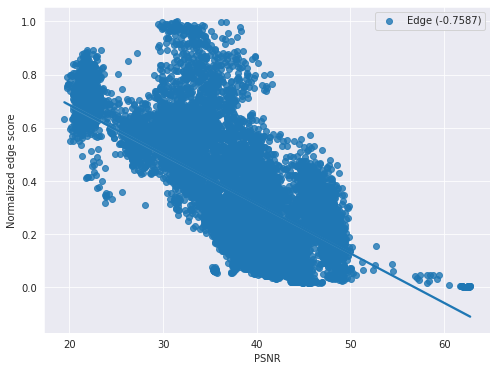

In [60]:
plt.figure(figsize=(8, 6))
sns.regplot(x='psnr_3', y='edge_3', data=corr_df)
plt.xlabel('PSNR')
plt.ylabel('Normalized edge score')
plt.legend(loc='upper right', labels=['Edge (-0.7587)'])
plt.show()

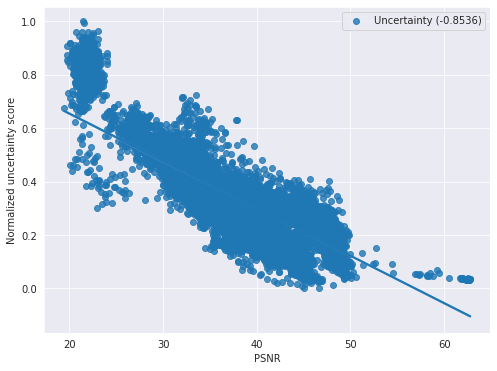

In [59]:
plt.figure(figsize=(8, 6))
sns.regplot(x='psnr_3', y='unc_3', data=corr_df)
plt.xlabel('PSNR')
plt.ylabel('Normalized uncertainty score')
plt.legend(loc='upper right', labels=['Uncertainty (-0.8536)'])
plt.show()